In [59]:
#!pip install word2number

In [73]:
import re
import os
import numpy as np
import pandas as pd
#import word2number as w2n
import matplotlib.pyplot as plt
from word2number.w2n import word_to_num

In [74]:
MAX_DIGITS = 7

def process_file(file_name):
    # need to prepocess the lines
    processed_lines = []

    rejected_lines = {'end with ?':[],'have no digit form num':[]}

    with open(file_name,'r') as file:
        for line in file:
            #print(line)
            # remove spaces and newlines
            line = line.strip()
            # some lines end with a question mark, and don't contain answers reject them
            if line.endswith('?'):
                rejected_lines['end with ?'].append(line)
                continue
                
            #split lne by equal sign
            parts = line.split('=')
            #check last part is a number may be positive or negative
            if not parts[-1].replace('-','').replace(',','').replace('(','').replace(')','').replace('.','').strip().isdigit():
                rejected_lines['have no digit form num'].append(line)
                continue
            #add line to processed lines
            modified_line = parts[0].strip() + ' = ' + parts[-1].replace(',','').replace('(','').replace(')','').strip()
            processed_lines.append(modified_line)

    return processed_lines, rejected_lines

In [75]:
processed_lines, rejected_lines = process_file('numeration_int_addition_gpu1/numertion_int_addn_pos_ww_opdigit.txt')
print('rejected lines:',rejected_lines)

rejected lines: {'end with ?': [], 'have no digit form num': ['four + seven =  eight', 'five + seven =  eight', 'six + seven =  eight', 'thirty-one + sixty-three =  answer= ninety-four', 'ninety-one + forty-six =  answer= one hundred thirty-seven', 'twenty-eight + thirty-nine =  answer= seventy-seven', 'ninety-eight + fifteen =  answer= one hundred five', 'fourteen + fifty-two =  answer= ninety-six', 'twenty-five + twelve =  answer= thirty-seven', 'thirty-three + ninety-five =  answer= one hundred twenty-eight', 'thirty-five + thirty-six =  answer= seventy-one', 'twenty-five + eighty-one =  answer= one hundred and five', 'fifty-three + twenty-eight =  answer= seventy-nine', 'seventy-three + ten =  answer= eighty-three', 'eighty-three + eighty-seven =  answer= one hundred seventy-eight', 'fifty-seven + thirty =  answer= ninety', 'sixty-two + thirty =  answer= ninety-two', 'ninety-five + forty-one =  answer= one hundred thirty-six', 'sixty-six + sixty-two =  answer= one hundred twenty-ei

In [76]:
#total files = 6
#numeration_int_addn_pos_ww_opdigit.txt
#numeration_int_addn_pos_dw_opdigit.txt
#numeration_int_addn_wndp_dw_opdigit.txt
#numeration_int_addn_wndp_ww_opdigit.txt
#numeration_int_addn_neg_ww_opdigit.txt
#numeration_int_addn_neg_dw_opdigit.txt

#process all files to get the processed lines
file_names=['numertion_int_addn_pos_dw_opdigit.txt','numertion_int_addn_pos_ww_opdigit.txt','numertion_int_addn_wndp_dw_opdigit.txt','numertion_int_addn_wndp_ww_opdigit.txt','numertion_int_addn_neg_dw_opdigit.txt','numertion_int_addn_neg_ww_opdigit.txt']

processed_lines = []

for file_name in file_names:
    processed_lines += process_file(file_name)[0]


print('total processed lines:',len(processed_lines))


total processed lines: 5498


In [77]:
processed_lines

['0 + zero = 0',
 '0 + one = 1',
 '0 + two = 2',
 'zero + 3 = 3',
 'zero + 4 = 4',
 'zero + 5 = 5',
 'zero + 6 = 6',
 '0 + seven = 7',
 'zero + 8 = 8',
 '0 + nine = 9',
 'one + 0 = 1',
 '1 + one = 2',
 'one + 2 = 3',
 '1 + three = 4',
 '1 + four = 5',
 '1 + five = 6',
 '1 + six = 7',
 '1 + seven = 8',
 '1 + eight = 9',
 '1 + nine = 10',
 'two + 0 = 2',
 '2 + one = 3',
 '2 + two = 4',
 '2 + three = 5',
 '2 + four = 6',
 '2 + five = 7',
 '2 + six = 8',
 '2 + seven = 9',
 'two + 8 = 10',
 '2 + nine = 11',
 '3 + zero = 3',
 'three + 1 = 4',
 'three + 2 = 5',
 '3 + three = 6',
 'three + 4 = 7',
 '3 + five = 8',
 '3 + six = 9',
 'three + 7 = 10',
 'three + 8 = 11',
 '3 + nine = 12',
 'four + 0 = 4',
 '4 + two = 6',
 'four + 3 = 7',
 'four + 4 = 8',
 'four + 5 = 9',
 '4 + six = 10',
 '4 + seven = 11',
 'four + 8 = 12',
 'four + 9 = 13',
 '5 + one = 6',
 '5 + two = 7',
 '5 + three = 8',
 '5 + four = 9',
 'five + 5 = 10',
 '5 + six = 11',
 'five + 7 = 12',
 'five + 8 = 13',
 'five + 9 = 14',
 '

In [78]:
def get_num_digits(num):
    return len(str(num).replace('-',''))

def word2num(word):
    # strip spaces
    word = word.strip()
    # remove commas
    word = word.replace(',','')
    # get sign
    sign = word.startswith('minus')
    num = ((-1)**sign)* word_to_num(word)
    return num

def is_correct(a,b,sum):
    return a+b == sum

In [83]:
total_dig_op = np.zeros((3,2,MAX_DIGITS))
correct_dig_op = np.zeros((3,2,MAX_DIGITS))
# to investigate whether lines are classified correctly or not
classified_lines = {0:
                    {0: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]},
                     1: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]}
                    },
               1:    
                    {0: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]},
                     1: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]}
                    },
               2:    
                    {0: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]},
                     1: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]}
                    }
                }
# axis 0: 0 = both positive, 1 = word neg digit pos, 2 = both negative
# axis 1: 0 = dw, 1 = ww
# axis 2: 0-6 = number of digits-1

for line in processed_lines:
    # split line into operands and sum
    try:
        a_b, sum = line.split('=')[0], line.split('=')[-1]
    except ValueError:
        print('error in spliting ab, sum',line)
        break
    # sometimes sum has commas
    sum = sum.replace(',','')

    # sometimes sum contains word 'minus' instead of '-'
    sum = sum.replace('minus ','-')

    sum = sum.strip()
    sum = sum.replace(' ','')
    sum = sum.replace('.','')
    

    # split operands into a and b
    a, b = a_b.split('+')

    # convert a, b and sum to numbers  
    try:
        a = int(a)      
        a_type = 0      # 0 = digit, 1 = word
    except ValueError:
        a = word2num(a)
        a_type = 1
    
    try:
        b = int(b)
        b_type = 0      # 0 = digit, 1 = word
    except ValueError:
        b = word2num(b) 
        b_type = 1
    
    try:
        sum = int(sum)
    except ValueError:
        # if sum is not a digit, skip this line
        print('sum not a digit',line)
        print('sum:',sum)
        continue

    # get number of digits 
    num_digits_a = get_num_digits(a)
    num_digits_b = get_num_digits(b)
    num_digits = min(num_digits_a,num_digits_b)
    # get dw or ww
    dw_or_ww = a_type*b_type # 0 = dw, 1 = ww

    if a>=0 and b>=0:
        sign_of_both = 0
    elif a<0 and b<0:
        sign_of_both = 2
    else:
        sign_of_both = 1
    
    total_dig_op[sign_of_both,dw_or_ww,num_digits-1] += 1
    correct_dig_op[sign_of_both,dw_or_ww,num_digits-1] += is_correct(a,b,sum)

    classified_lines[sign_of_both][dw_or_ww][num_digits-1].append((line, a, b, sum))

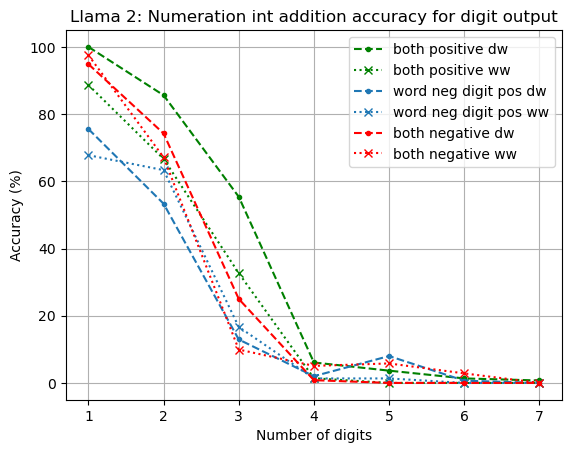

In [86]:
accuracy_digit = correct_dig_op*100/total_dig_op
digits = np.arange(1,MAX_DIGITS+1)
# plot accuracy
plt.plot(digits, accuracy_digit[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive dw')
plt.plot(digits, accuracy_digit[0,1],marker='x',linestyle=':',color='green',label='both positive ww')
plt.plot(digits, accuracy_digit[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='word neg digit pos dw')
plt.plot(digits, accuracy_digit[1,1],marker='x',linestyle=':',color='#1f77b4',label='word neg digit pos ww')
plt.plot(digits, accuracy_digit[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative dw')
plt.plot(digits, accuracy_digit[2,1],marker='x',linestyle=':',color='red',label='both negative ww')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Numeration int addition accuracy for digit output')
plt.legend()
plt.grid()
plt.show()

In [87]:
def process_file_word_output(file_name):
    # need to prepocess the lines
    processed_lines = []

    rejected_lines = {'end with ?':[],'have no word form num':[]}

    with open(file_name,'r') as file:
        for line in file:
            #print(line)
            # remove spaces and newlines
            line = line.strip()
            # some lines end with a question mark, and don't contain answers reject them
            if line.endswith('?'):
                rejected_lines['end with ?'].append(line)
                continue
                
            #split lne by equal sign
            parts = line.split('=')
            #if last part is a number may be positive or negative reject it
            if parts[-1].replace('-','').replace(',','').replace('(','').replace(')','').replace('.','').strip().isdigit():
                rejected_lines['have no word form num'].append(line)
                continue
            #add line to processed lines
            modified_line = parts[0].strip() + ' = ' + parts[-1].strip()
            processed_lines.append(modified_line)

    return processed_lines, rejected_lines

In [92]:

file_names=['numertion_int_addn_pos_dw_opw.txt','numertion_int_addn_pos_ww_opw.txt','numertion_int_addn_wndp_dw_ow.txt','numertion_int_addn_wndp_ww_ow.txt','numertion_int_addn_neg_dw_opw.txt','numertion_int_addn_neg_ww_ow.txt']


processed_lines = []

for file_name in file_names:
    processed_lines += process_file_word_output(file_name)[0]

print('total processed lines:',len(processed_lines))

total processed lines: 5769


In [93]:
def get_num_digits(num):
    return len(str(num).replace('-',''))

def word2num(word):
    # strip spaces
    word = word.strip()
    # remove commas
    word = word.replace(',','')
    # get sign
    sign = word.startswith('minus')
    num = ((-1)**sign)* word_to_num(word)
    return num

def is_correct(a,b,sum):
    return a+b == sum

In [97]:
total_word_op = np.zeros((3,2,MAX_DIGITS))
correct_word_op = np.zeros((3,2,MAX_DIGITS))
# to investigate whether lines are classified correctly or not
classified_lines = {0:
                    {0: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]},
                     1: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]}
                    },
               1:    
                    {0: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]},
                     1: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]}
                    },
               2:    
                    {0: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]},
                     1: {0:[],1:[],2:[],3:[],4:[],5:[],6:[]}
                    }
                }
# axis 0: 0 = both positive, 1 = word neg digit pos, 2 = both negative
# axis 1: 0 = dw, 1 = ww
# axis 2: 0-6 = number of digits-1
rejected_lines = {'error in spliting ab, sum':[],'invalid sum':[]}
for line in processed_lines:
    # strip spaces
    line = line.strip()
    # some lines have numbering at start, eg 1. a + b = sum,
    # remove the numbering and dot if present
    line = re.sub(r'^\d+\.\s*','',line)
    # some lines have * at start and end of numbers, remove them
    line = re.sub(r'\*','',line)
    # split line into operands and sum
    try:
        a_b, sum = line.split('=')[0], line.split('=')[-1]
    except ValueError:
        rejected_lines['error in spliting ab, sum'].append(line)
        break

    # split operands into a and b
    a, b = a_b.split('+')

    # convert a, b and sum to numbers  
    try:
        a = int(a)      
        a_type = 0      # 0 = digit, 1 = word
    except ValueError:
        a = word2num(a)
        a_type = 1
    
    try:
        b = int(b)
        b_type = 0      # 0 = digit, 1 = word
    except ValueError:
        b = word2num(b) 
        b_type = 1
    
    try:
        #if sum has zero hundred word then go to except block
        if 'zero hundred' in sum:
            raise ValueError
        sum = word2num(sum)

    except ValueError:
        # if sum is not a word, skip this line
        rejected_lines['invalid sum'].append(line)
        continue

    # get number of digits 
    num_digits_a = get_num_digits(a)
    num_digits_b = get_num_digits(b)
    num_digits = min(num_digits_a,num_digits_b)
    # get dw or ww
    dw_or_ww = a_type*b_type # 0 = dw, 1 = ww

    if a>=0 and b>=0:
        sign_of_both = 0
    elif a<0 and b<0:
        sign_of_both = 2
    else:
        sign_of_both = 1
    
    total_word_op[sign_of_both,dw_or_ww,num_digits-1] += 1
    correct_word_op[sign_of_both,dw_or_ww,num_digits-1] += is_correct(a,b,sum)

    classified_lines[sign_of_both][dw_or_ww][num_digits-1].append((line, a, b, sum))

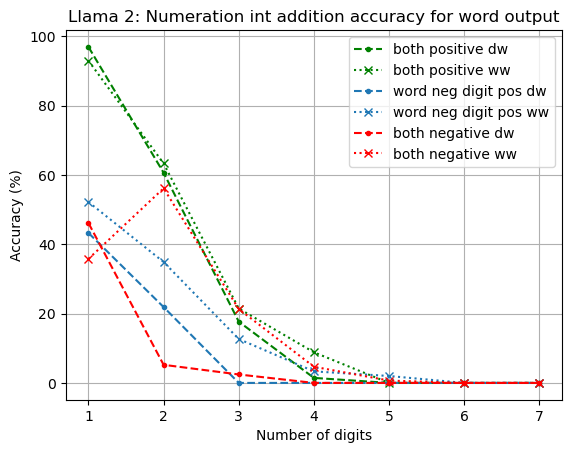

In [100]:
accuracy_word = correct_word_op*100/total_word_op
digits = np.arange(1,MAX_DIGITS+1)
# plot accuracy
plt.plot(digits, accuracy_word[0,0],marker='o',ms=3,linestyle='--',color='green',label='both positive dw')
plt.plot(digits, accuracy_word[0,1],marker='x',linestyle=':',color='green',label='both positive ww')
plt.plot(digits, accuracy_word[1,0],marker='o',ms=3,linestyle='--',color='#1f77b4',label='word neg digit pos dw')
plt.plot(digits, accuracy_word[1,1],marker='x',linestyle=':',color='#1f77b4',label='word neg digit pos ww')
plt.plot(digits, accuracy_word[2,0],marker='o',ms=3,linestyle='--',color='red',label='both negative dw')
plt.plot(digits, accuracy_word[2,1],marker='x',linestyle=':',color='red',label='both negative ww')
plt.xlabel('Number of digits')
plt.ylabel('Accuracy (%)')
plt.title('Llama 2: Numeration int addition accuracy for word output')
plt.legend()
plt.grid()
plt.show()